# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 9</center>

# <center>Decision Tree for Classification and Regression</center>



# <font color = blue>Part A - Classification

## 1. Loading Data and Manipulating with Pandas

Instructions:

- Load iris dataset from sklearn.datasets module 




In [22]:
#Your solution here
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()
idf=pd.DataFrame(iris.data,columns=iris.feature_names)
idf.head()



sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## 2. Train test split

Instructions:

- Split your datasets into train and test set




In [23]:
#Your solution here
from sklearn.model_selection import train_test_split
idf['target']=iris.target

X = idf.drop(['target'], axis=1)

y=idf.target
X.head()

#Split the data into training and testing sets

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5, stratify=idf.target)
y_test




36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## 3. Model Training

Instructions:

- Import DecisionTreeClassifier Algorithm from sklearn.





In [30]:
#Your solution here
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=3, criterion='entropy')



#train the model
dtc.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

## 3. Model Evaluation

Instructions:

- Use test set to evaluate your model's performance.





In [31]:
#Your  solution  here


## 4. Plot Tree

Instructions:

- Use sklearn tree module to plot the tree.





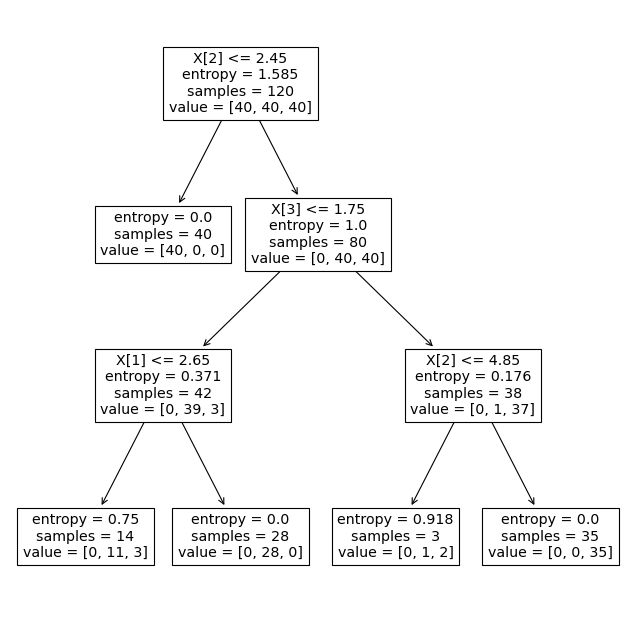

In [32]:
# write your solution here

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10),dpi=80)
plot_tree(dtc)
plt.show()


## 5. Make Prediction

Instructions:

- Use sample data to make prediction





In [33]:
#write your solution here
dtc.predict(X_test)



array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

# <font color = blue>Part B - Regression

## 1. Loading Data and Manipulating with Pandas

Instructions:

- Load boston dataset from sklearn.datasets module 




In [18]:
#Your solution here
from sklearn.datasets import load_boston
boston = load_boston()

bdf = pd.DataFrame(boston.data, columns=boston.feature_names)
bdf




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

## 2. Train test split

Instructions:

- Split your datasets into train and test set




In [34]:
#Your solution here
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X=bdf[['LSTAT']]
y=boston.target


#Split the data into training and testing sets

# X_train, X_test, y_train,y_test(X,y,test_size=0.2, random_state=5)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)





## 3. Model Training

Instructions:

- Import DecisionTreeRegressor Algorithm from sklearn.




In [45]:
from sklearn.tree import DecisionTreeRegressor

rtc=DecisionTreeRegressor(max_depth=3)


#train the model
rtc.fit(X_train,y_train)




DecisionTreeRegressor(max_depth=3)

## 3. Model Evaluation

Instructions:

- Use test set to evaluate your model's performance.





In [46]:
#Your solution here





## 4. Plot Tree

Instructions:

- Use sklearn tree module to plot the tree.





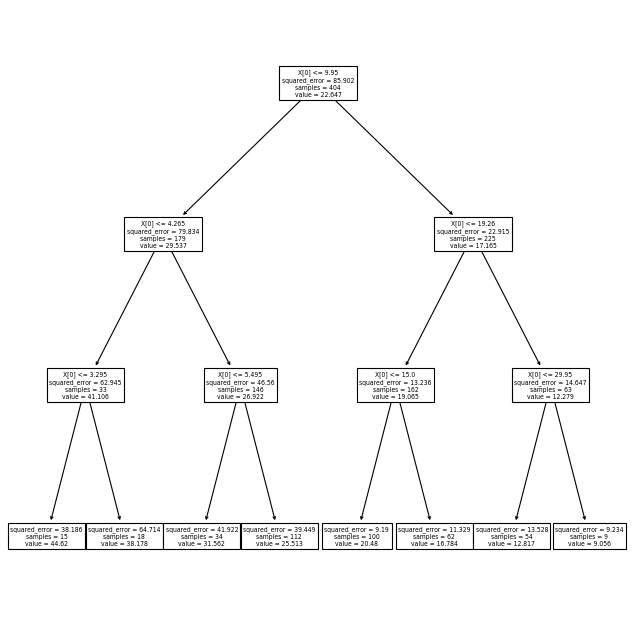

In [47]:
#write your solution here
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10),dpi=80)
plot_tree(rtc)
plt.show()



## 5. Make Prediction

Instructions:

- Use sample data to make prediction





In [56]:
#write your solution here
x_sample = [[6]]
rtc.predict(x_sample)[0]

# boston.target_names[0]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


25.513392857142865